# Ejercicios pair


In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames 

#para desplegar todos los decimales y no tener el formato científico:
#👀 OJO! estar atenta cuando lo pones que no estás perdiendo información
pd.options.display.float_format = '{:.2f}'.format 

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('world_data_full_apply_nulos (2).csv', index_col=0)


1. Calcula las siguientes estadísticas descriptivas para las variables numéricas:

Media

Mediana

Desviación estándar

Mínimo

Máximo

In [3]:
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia


In [4]:
numericas = df.select_dtypes(exclude = 'O').columns

In [5]:
numericas

Index(['density', 'agricultural_land', 'land_area', 'armed_forces_size',
       'birth_rate', 'calling_code', 'co2-emissions', 'cpi', 'cpi_change',
       'fertility_rate', 'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitude',
       'longitude'],
      dtype='object')

In [9]:
df_num = df[numericas].agg(['mean', 'median', 'std', 'min', 'max']).T

In [12]:
df_num

,mean,median,std,min,max
density,134.50,83.00,157.31,1.26,847.00
agricultural_land,39.12,39.60,21.78,0.60,82.60
land_area,255.21,148.46,258.39,0.00,964.00
armed_forces_size,103.78,28.50,167.16,0.00,936.00
birth_rate,20.21,17.95,9.95,5.90,46.08
calling_code,360.55,255.50,323.24,1.00,1876.00
co2-emissions,125.92,34.48,181.79,1.02,727.97
cpi,144.19,124.74,54.78,99.03,550.93
cpi_change,6.72,2.30,24.45,-4.30,254.90
fertility_rate,2.70,2.25,1.28,0.98,6.91


2. Identifica el país con la mayor densidad de población y el país con la menor población en el conjunto de datos.

In [ ]:
df_max_density = df['density'].max()

In [14]:
df_max_density

np.float64(847.0)

In [16]:
df[['country', 'density']].sort_values('density', ascending = False) #país con mayor densidad

,country,density
133,Palestinian National Authority,847.00
111,Federated States of Micronesia,784.00
14,Barbados,668.00
94,Lebanon,667.00
109,Mauritius,626.00
...,...,...
73,Vatican City,2.00
114,Mongolia,2.00
104,Maldives,1.80
106,Malta,1.38


In [17]:
df[['country', 'population']].sort_values('population', ascending = True) #País con menor poblacion

,country,population
120,Nauru,10.08
181,Tuvalu,11.65
132,Palau,18.23
149,San Marino,33.86
98,Liechtenstein,38.02
...,...,...
190,Venezuela,NaN
191,Vietnam,NaN
192,Yemen,NaN
193,Zambia,NaN


3. Calcula la tasa promedio de natalidad (birth_rate) para todos los países en el conjunto de datos.



In [18]:
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia


In [19]:
df['birth_rate'].mean()

np.float64(20.214973544973546)

4. Realiza un análisis de la mortalidad infantil (infant_mortality) y clasifica los países en tres categorías: baja, moderada y alta mortalidad infantil.

In [22]:
df['infant_mortality'].describe()

count   189.00
mean     21.33
std      19.55
min       1.40
25%       6.00
50%      14.00
75%      32.70
max      84.50
Name: infant_mortality, dtype: float64

<Axes: ylabel='infant_mortality'>

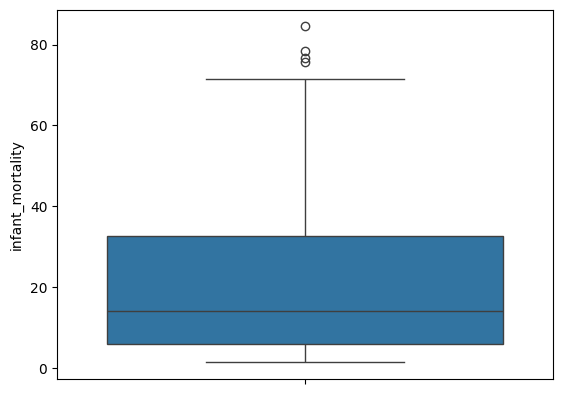

In [23]:
sns.boxplot(y = "infant_mortality", 
            data = df);

In [25]:
def clasificacion_infant_mortality(dato):
    if dato < 6:
        return 'Baja'
    elif dato < 14:
        return 'Moderada'
    elif dato < 32.70:
            return 'Alta'
    else:
        return 'Muy alta'


In [27]:
df['infant_mortality_clasificacion'] = df['infant_mortality'].apply(clasificacion_infant_mortality)

In [28]:
df['infant_mortality_clasificacion'].value_counts()

infant_mortality_clasificacion
Muy alta    54
Moderada    47
Alta        47
Baja        47
Name: count, dtype: int64

In [29]:
df.head(1)

,country,density,abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,latitude,longitude,continent,infant_mortality_clasificacion
0,Afghanistan,60.00,AF,58.10,652.23,323.00,32.49,93.00,Kabul,8.67,149.90,2.30,AFN,4.47,2.10,0.70,19101353833.00,104.00,9.70,47.90,Kabul,64.50,638.00,0.43,Pashto,78.40,0.28,NaN,48.90,9.30,71.40,11.12,NaN,33.94,67.71,Asia,Muy alta


5. Calcula la correlación entre las variables de "fertility_rate" y "life_expectancy". Interpreta la relación entre estas dos variables. ¿Qué tipo de correlación hay? Explica la razón de esta relación



In [ ]:
df[['fertility_rate', 'life_expectancy']].corr(method = 'pearson') #filtramos sólo las columnas que nos interesan

,fertility_rate,life_expectancy
fertility_rate,1.00,-0.85
life_expectancy,-0.85,1.00


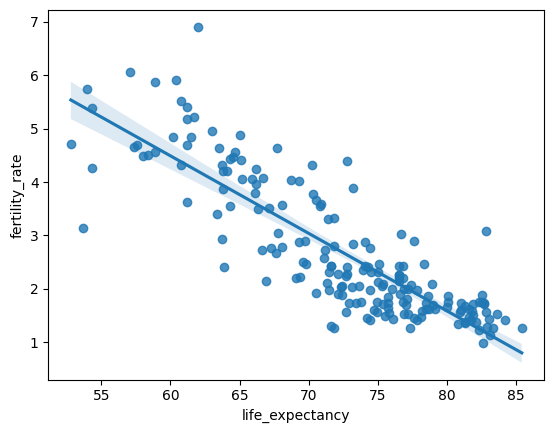

In [34]:
sns.regplot(x = "life_expectancy", 
            y = "fertility_rate", 
            data = df);

6. Visualiza la distribución de la variable "cpi" utilizando un histograma y comenta sobre la distribución de los índices de percepción de corrupción.



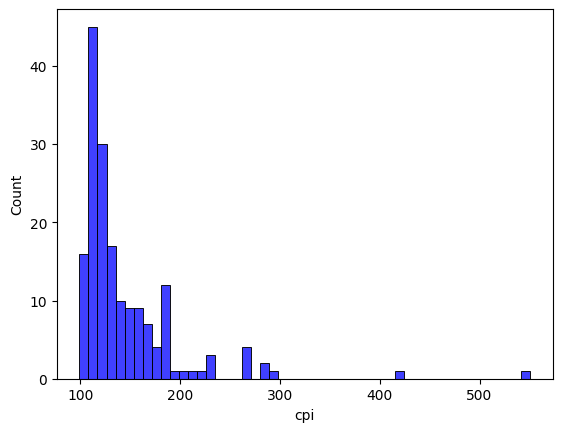

In [39]:
sns.histplot(data=df, x="cpi", bins=50, color="blue");


<Axes: xlabel='cpi'>

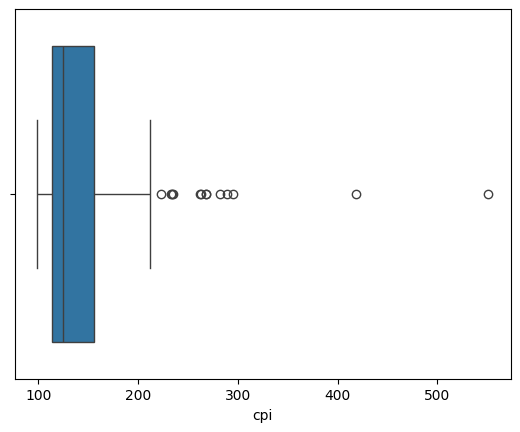

In [ ]:
sns.boxplot(data=df, x="cpi");

7. Encuentra el país con la mayor diferencia entre el "gdp" (Producto Interno Bruto) y el "co2-emissions" (emisiones de dióxido de carbono).

